In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:


df.shape



(300153, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
df.isna().sum()


airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
numerical_features = [numeric for numeric in df.columns if df[numeric].dtype != 'O']
df[numerical_features].head()

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955


In [8]:
categorical_features = [categoric for categoric in df.columns if df[categoric].dtype == 'O']
df[categorical_features].head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy


In [9]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
print (df['price'].median())

7425.0


Text(0, 0.5, 'The Number of Flights')

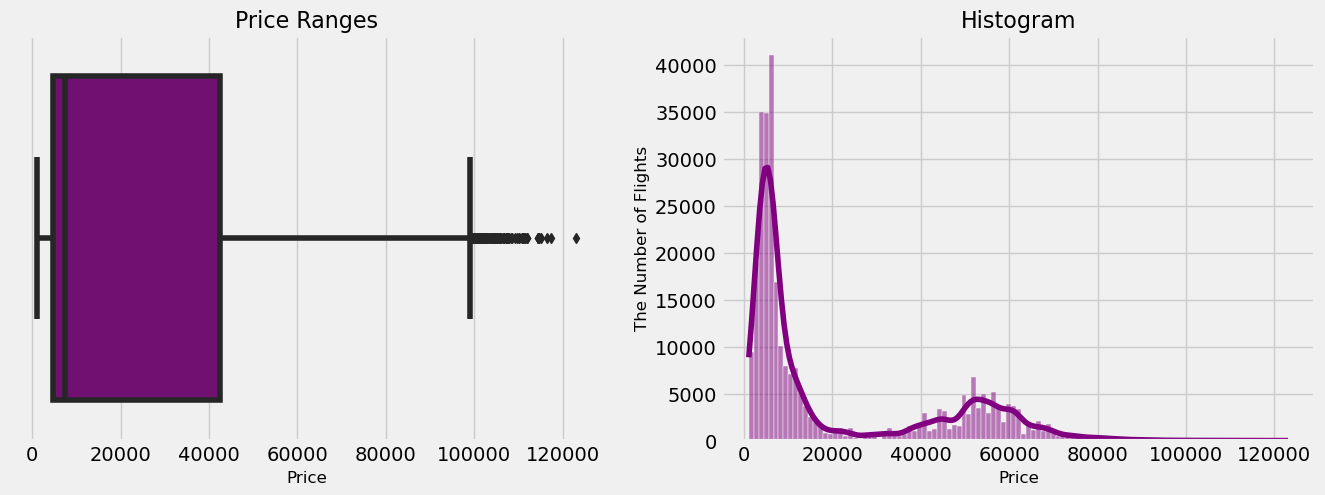

In [11]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = df, color="purple")
plt.title('Price Ranges',fontsize=16)
plt.xlabel('Price',fontsize=12)

plt.subplot(1,2,2)
sns.histplot(x = 'price', data = df, kde = True, color="purple")
plt.title('Histogram',fontsize=16)
plt.xlabel('Price',fontsize=12)
plt.ylabel('The Number of Flights',fontsize=12)

In [12]:
df1 = df.loc[df["class"]=='Economy']
df2 = df.loc[df["class"]=='Business']



print (df1['price'].median())
print (df2['price'].median())



print (df1['price'].mean())
print (df2['price'].mean())

5772.0
53164.0
6572.342383362527
52540.08112357868


In [13]:
df1.describe()

,duration,days_left,price
count,206666.000000,206666.000000,206666.000000
mean,11.550060,26.123673,6572.342383
std,7.241284,13.529610,3743.519517
min,0.830000,1.000000,1105.000000
25%,6.250000,15.000000,4173.000000
50%,10.170000,26.000000,5772.000000
75%,15.250000,38.000000,7746.000000
max,49.830000,49.000000,42349.000000


In [14]:
df2.describe()

,duration,days_left,price
count,93487.000000,93487.000000,93487.000000
mean,13.704274,25.741857,52540.081124
std,6.852555,13.626538,12969.314606
min,1.000000,1.000000,12000.000000
25%,8.830000,14.000000,45185.000000
50%,13.080000,26.000000,53164.000000
75%,17.830000,38.000000,60396.000000
max,47.750000,49.000000,123071.000000


Text(0, 0.5, 'The Number of Flights')

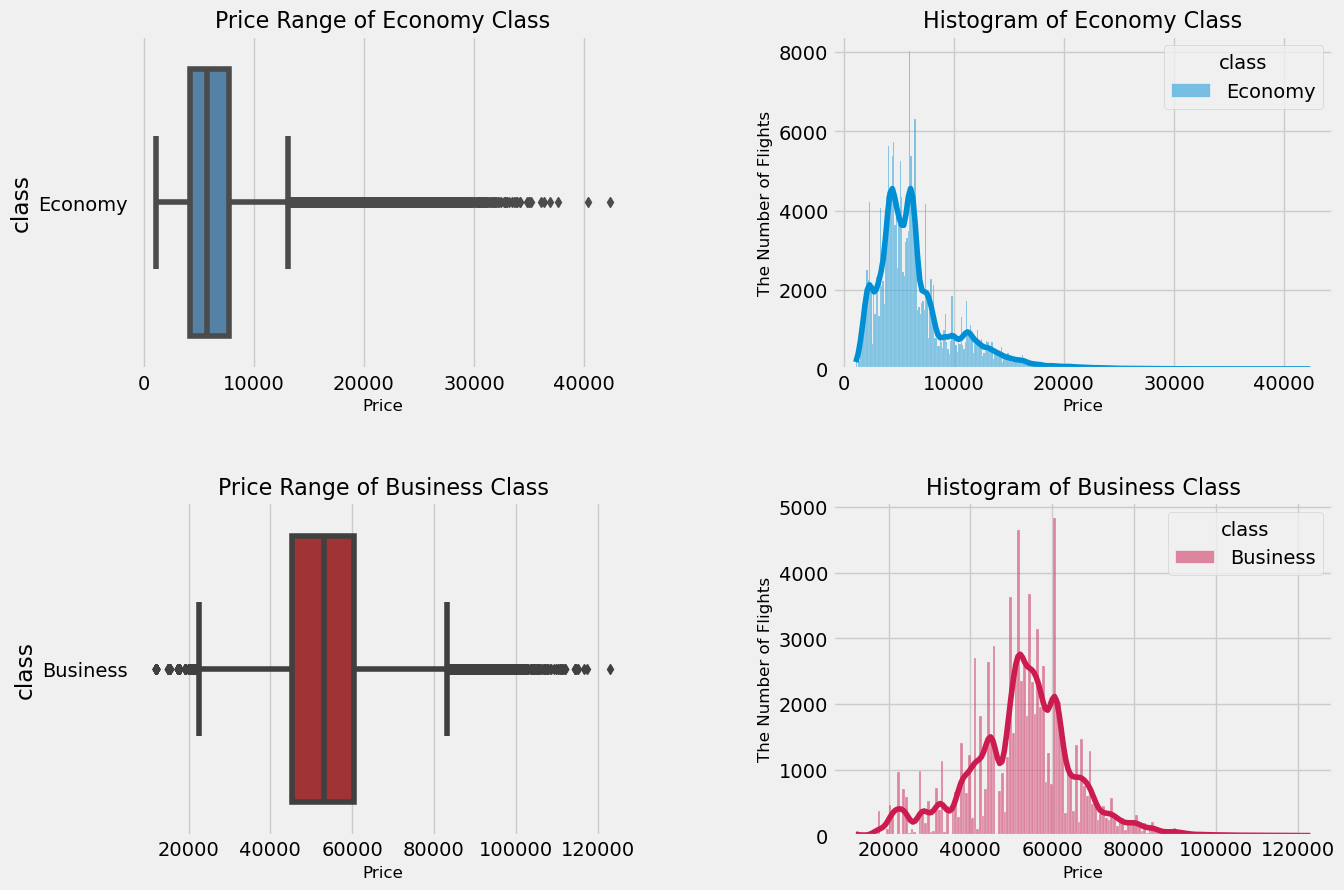

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,10))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(2,2,1)
sns.boxplot(y = 'class', x='price', data = df.loc[df["class"]=='Economy'], color="steelblue")
plt.title('Price Range of Economy Class',fontsize=16)
plt.xlabel('Price',fontsize=12)

plt.subplot(2,2,3)
sns.boxplot(y = 'class', x='price', data = df.loc[df["class"]=='Business'], color="firebrick")
plt.title('Price Range of Business Class',fontsize=16)
plt.xlabel('Price',fontsize=12)

plt.subplot(2,2,2)
sns.histplot(x = 'price', data = df.loc[df["class"]=='Economy'], kde = True, hue='class')
plt.title('Histogram of Economy Class',fontsize=16)
plt.xlabel('Price',fontsize=12)
plt.ylabel('The Number of Flights',fontsize=12)

plt.subplot(2,2,4)
sns.histplot(x = 'price', data = df.loc[df["class"]=='Business'], kde = True, hue='class', palette='rocket')
plt.title('Histogram of Business Class',fontsize=16)
plt.xlabel('Price',fontsize=12)
plt.ylabel('The Number of Flights',fontsize=12)

Text(0, 0.5, 'Price')

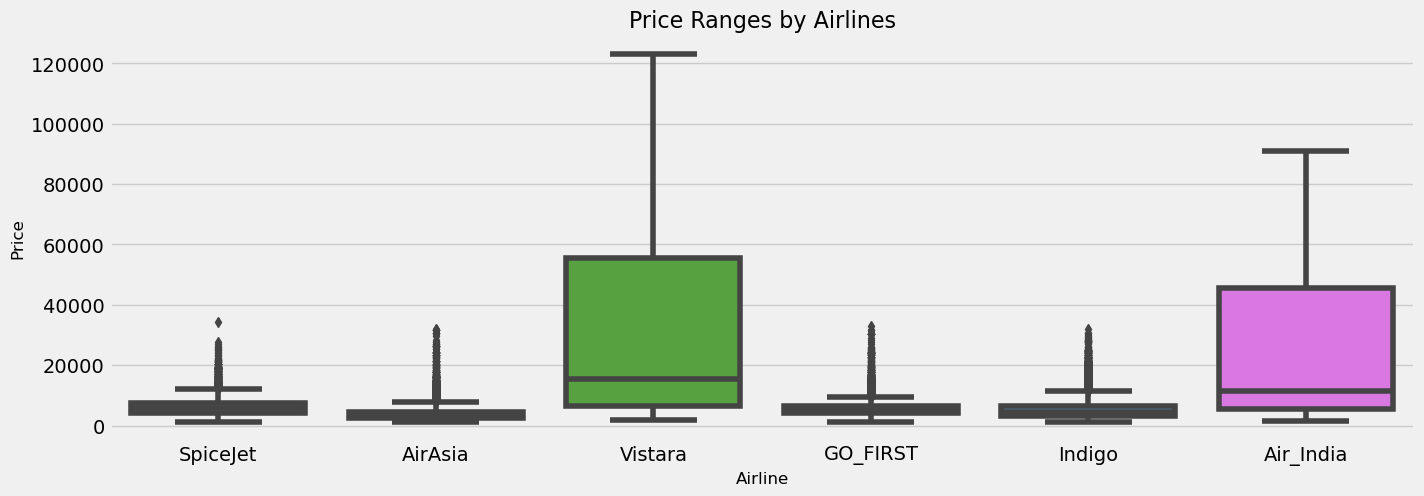

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='husl')
plt.title('Price Ranges by Airlines',fontsize=16)
plt.xlabel('Airline',fontsize=12)
plt.ylabel('Price',fontsize=12)

Text(0, 0.5, 'Price')

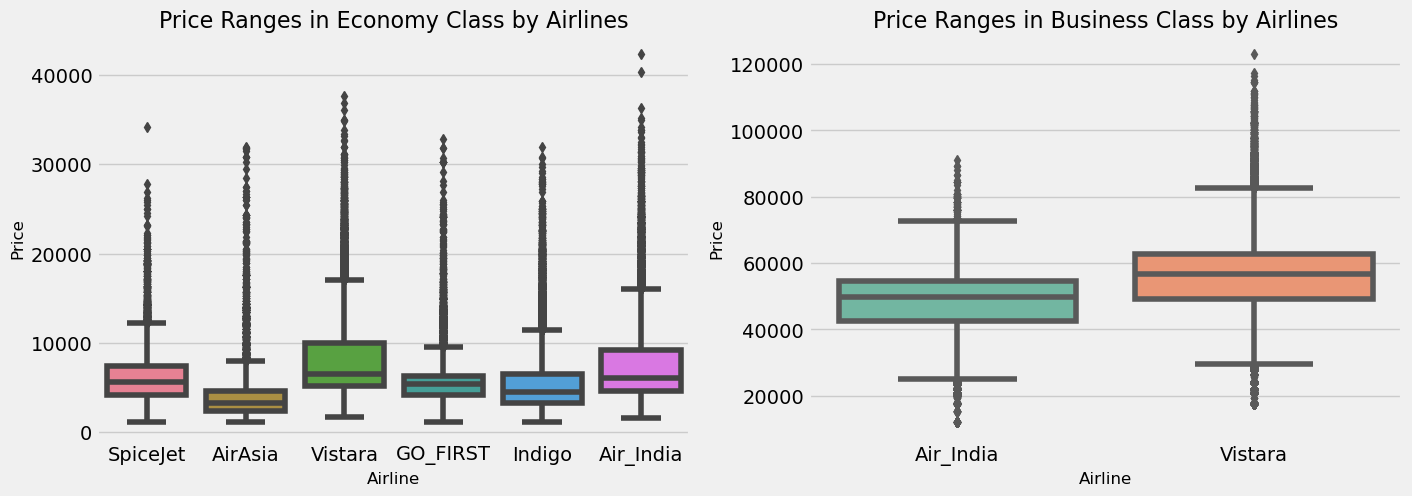

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'airline', y='price', data = df.loc[df["class"]=='Economy'], palette='husl')
plt.title('Price Ranges in Economy Class by Airlines',fontsize=16)
plt.xlabel('Airline',fontsize=12)
plt.ylabel('Price',fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x = 'airline', y='price', data = df.loc[df["class"]=='Business'], palette='Set2')
plt.title('Price Ranges in Business Class by Airlines',fontsize=16)
plt.xlabel('Airline',fontsize=12)
plt.ylabel('Price',fontsize=12)

Text(0, 0.5, 'Price')

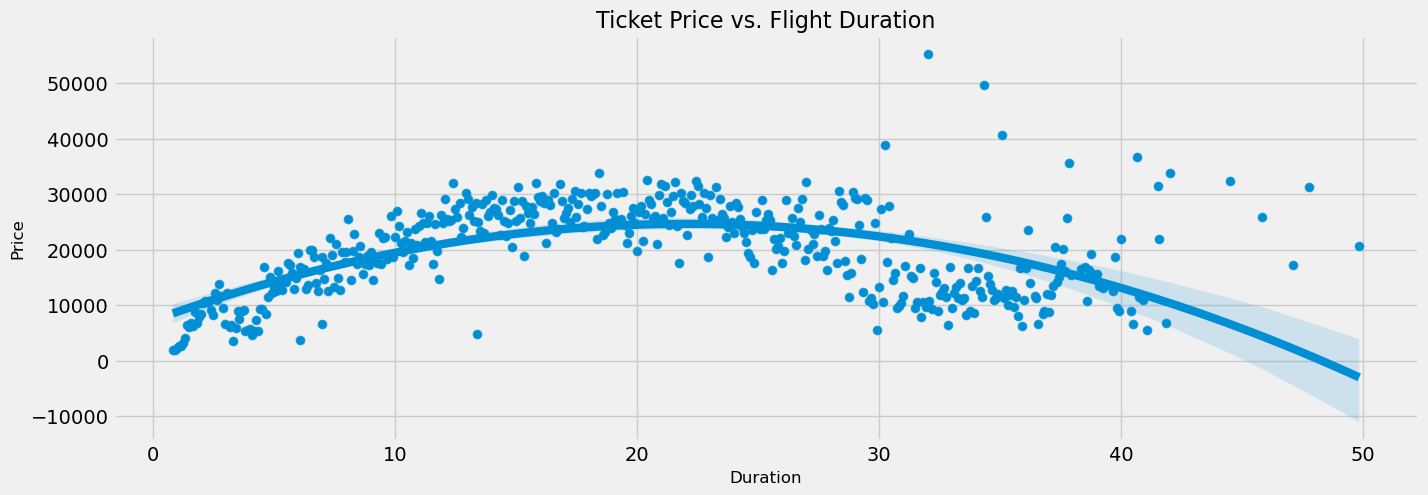

In [18]:
dfduration = df.groupby(['duration'])['price'].mean().reset_index()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
sns.scatterplot(data=dfduration, x="duration", y="price")
sns.regplot(data=dfduration, x="duration", y="price", order=2)
plt.title('Ticket Price vs. Flight Duration',fontsize=16)
plt.xlabel('Duration',fontsize=12)
plt.ylabel('Price',fontsize=12)

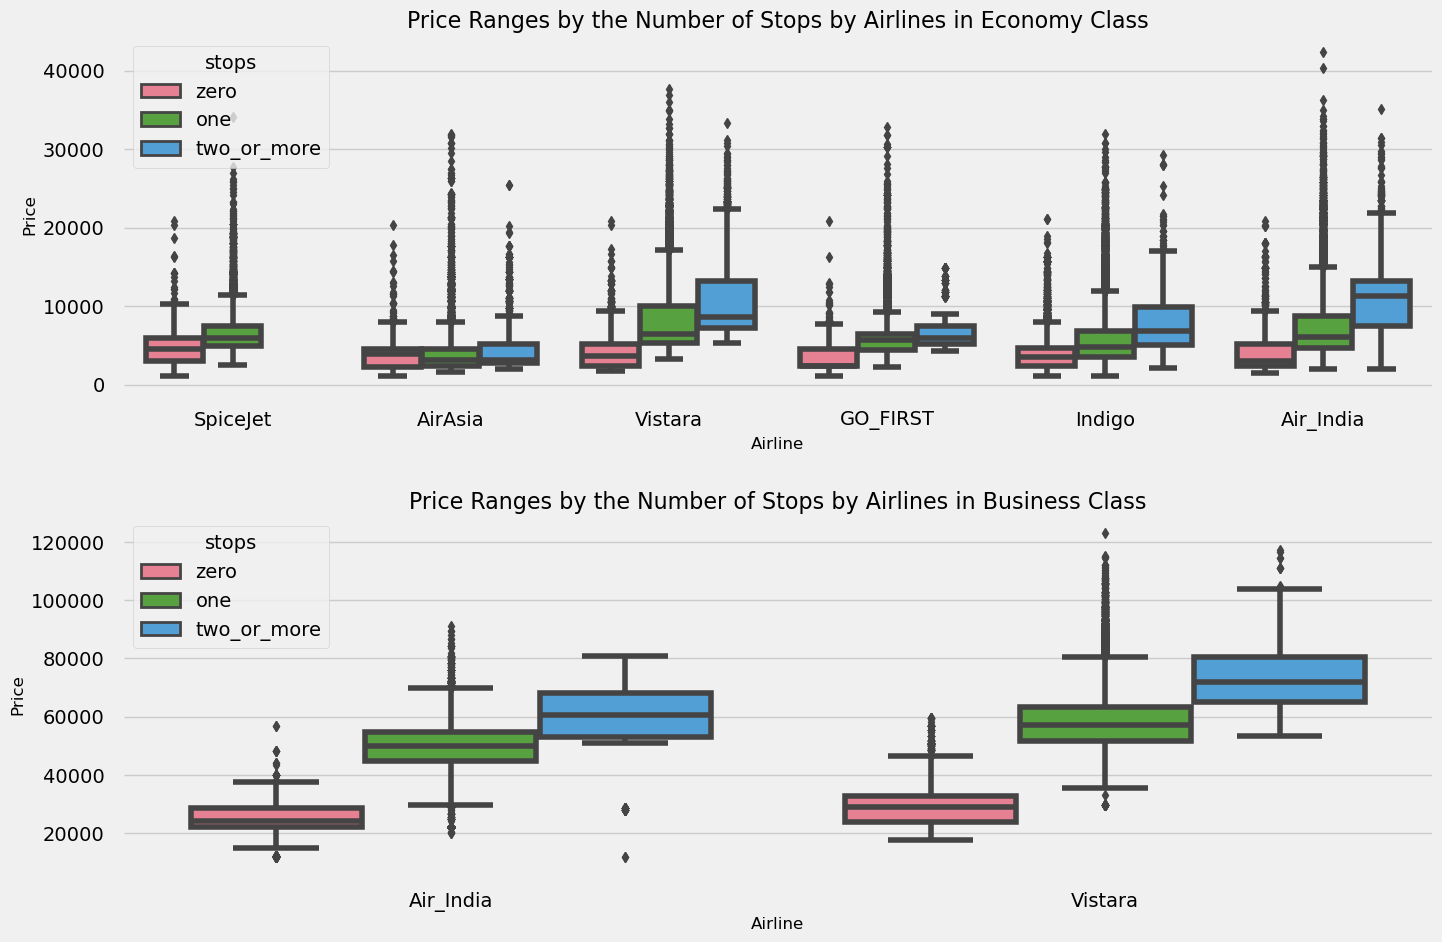

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
sns.boxplot(x="airline", y="price",
            hue="stops", palette='husl',
            data=df.loc[df["class"]=='Economy'])
sns.despine(offset=10, trim=True)
plt.title('Price Ranges by the Number of Stops by Airlines in Economy Class',fontsize=16)
plt.xlabel('Airline',fontsize=12)
plt.ylabel('Price',fontsize=12)

plt.subplot(2,1,2)
sns.boxplot(x="airline", y="price",
            hue="stops", palette='husl',
            data=df.loc[df["class"]=='Business'])
sns.despine(offset=10, trim=True)
plt.title('Price Ranges by the Number of Stops by Airlines in Business Class',fontsize=16)
plt.xlabel('Airline',fontsize=12)
plt.ylabel('Price',fontsize=12)

plt.tight_layout(pad=2.0)


Text(0, 0.5, 'Price')

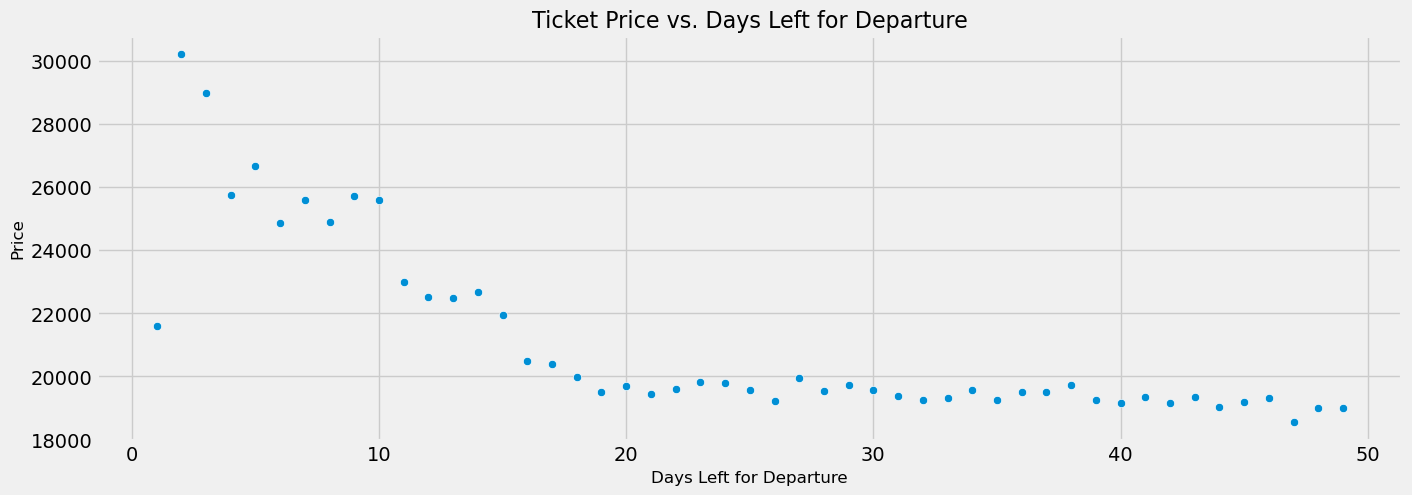

In [20]:
dfdaysleft = df.groupby(['days_left'])['price'].mean().reset_index()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
sns.scatterplot(data=dfdaysleft, x="days_left", y="price")
plt.title('Ticket Price vs. Days Left for Departure',fontsize=16)
plt.xlabel('Days Left for Departure',fontsize=12)
plt.ylabel('Price',fontsize=12)

Text(0, 0.5, 'Price')

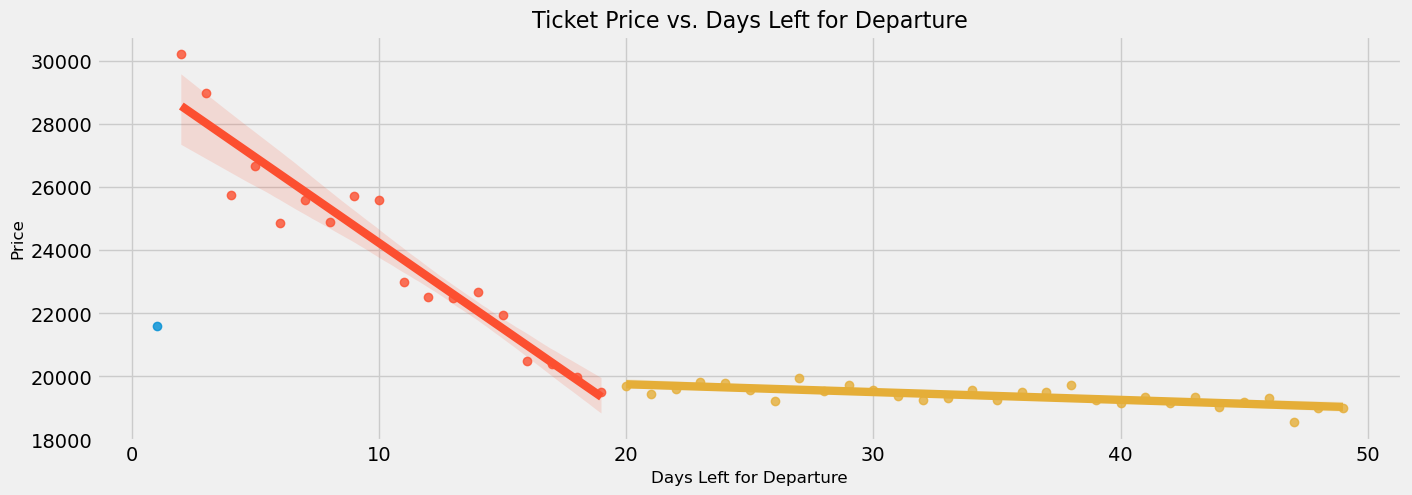

In [21]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
ax = plt.axes()
sns.regplot(x=dfdaysleft.loc[dfdaysleft["days_left"]==1].days_left, y=dfdaysleft.loc[dfdaysleft["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=dfdaysleft.loc[(dfdaysleft["days_left"]>1)&(dfdaysleft["days_left"]<20)].days_left, y=dfdaysleft.loc[(dfdaysleft["days_left"]>1)&(dfdaysleft["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=dfdaysleft.loc[dfdaysleft["days_left"]>=20].days_left, y=dfdaysleft.loc[dfdaysleft["days_left"]>=20].price, fit_reg=True, ax=ax)
plt.title('Ticket Price vs. Days Left for Departure',fontsize=16)
plt.xlabel('Days Left for Departure',fontsize=12)
plt.ylabel('Price',fontsize=12)

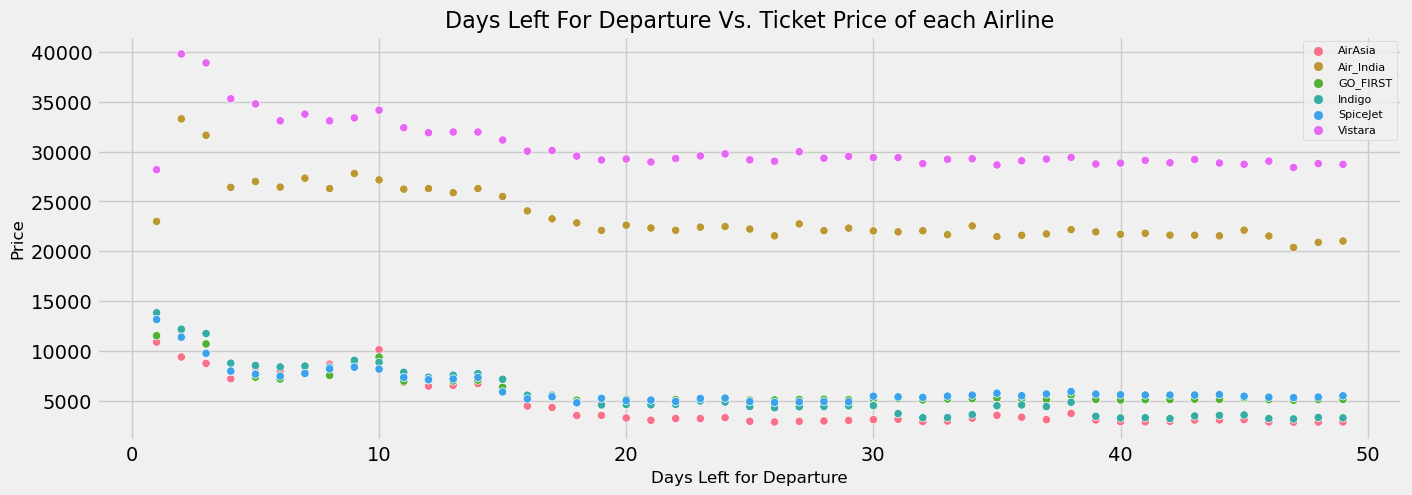

In [22]:


dfdaysleft2 = df.groupby(['days_left','airline'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
sns.scatterplot(data=dfdaysleft2,x='days_left',y='price',color='magenta',hue='airline',palette='husl')
plt.title('Days Left For Departure Vs. Ticket Price of each Airline',fontsize=16)
plt.legend(fontsize=8, loc='upper right')
plt.xlabel('Days Left for Departure',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()



In [23]:
def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    from matplotlib.cm import get_cmap
    
    regplots = []
    
    levels = data[hue].unique()
    
    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}
    
    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[key],
                **kwargs
            )
        )
    
    return regplots

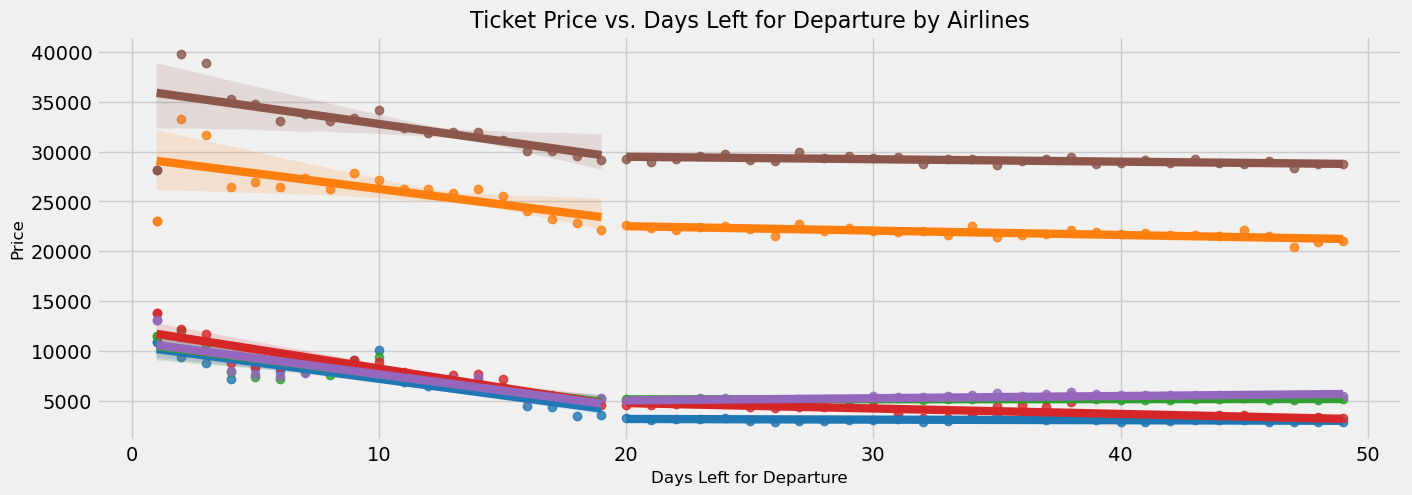

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
ax = plt.axes()
hue_regplot(data=dfdaysleft2.loc[dfdaysleft2['days_left'] == 1], x='days_left', y='price', hue='airline', ax=ax)
hue_regplot(data=dfdaysleft2.loc[dfdaysleft2['days_left'] < 20], x='days_left', y='price', hue='airline', ax=ax)
hue_regplot(data=dfdaysleft2.loc[dfdaysleft2['days_left'] >= 20], x='days_left', y='price', hue='airline', ax=ax)
plt.title('Ticket Price vs. Days Left for Departure by Airlines',fontsize=16)
plt.xlabel('Days Left for Departure',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

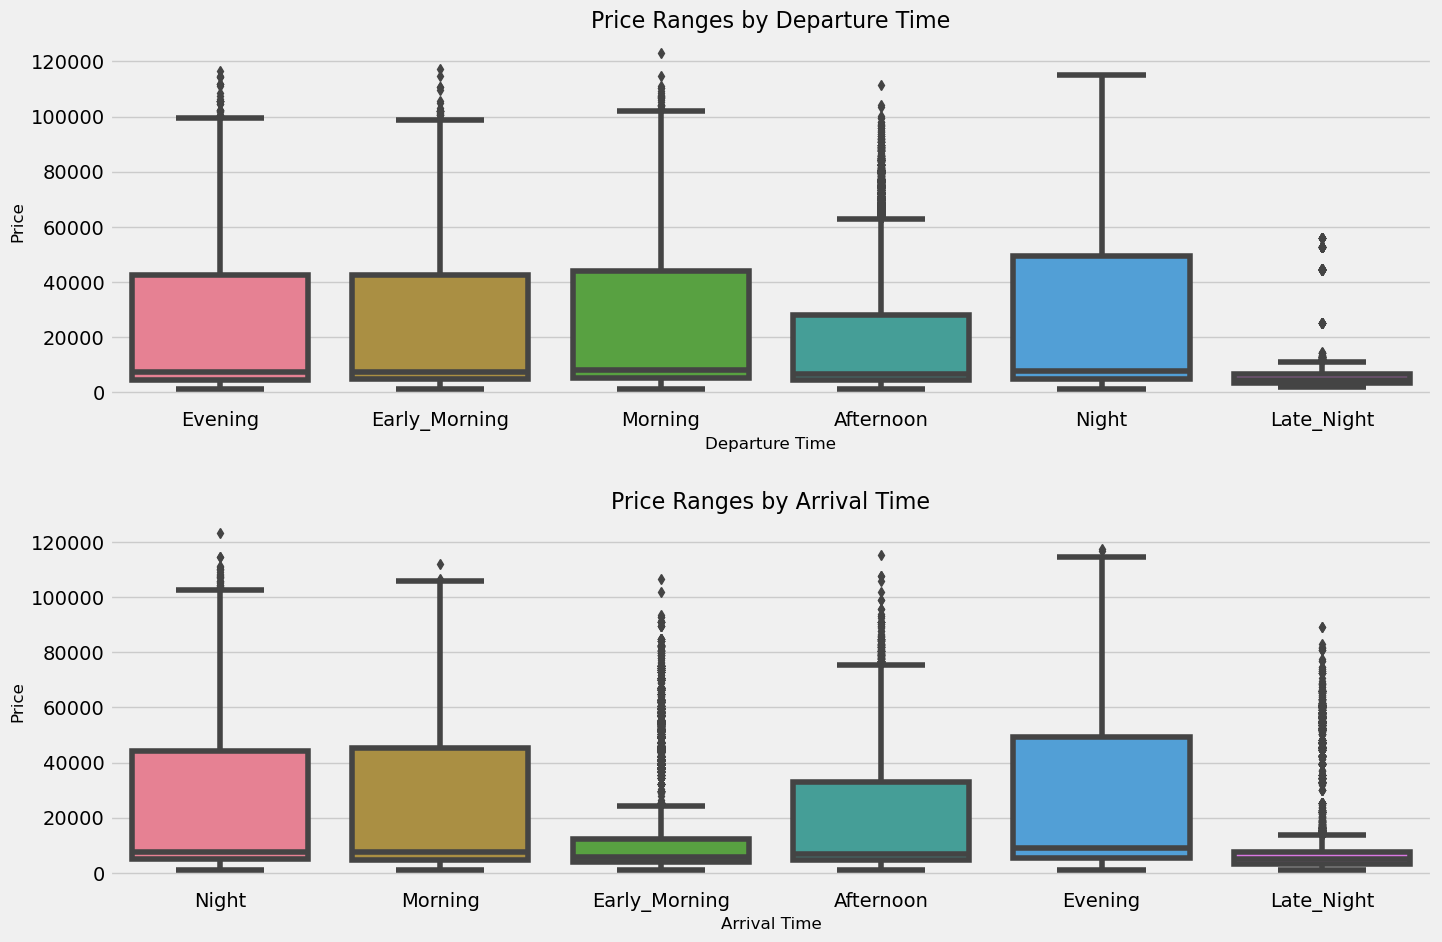

In [25]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x='departure_time',y='price',data=df,palette='husl')
plt.title('Price Ranges by Departure Time',fontsize=16)
plt.xlabel('Departure Time',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.subplot(2,1,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='husl')
plt.title('Price Ranges by Arrival Time',fontsize=16)
plt.xlabel('Arrival Time',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.tight_layout(pad=2.0)
plt.show()

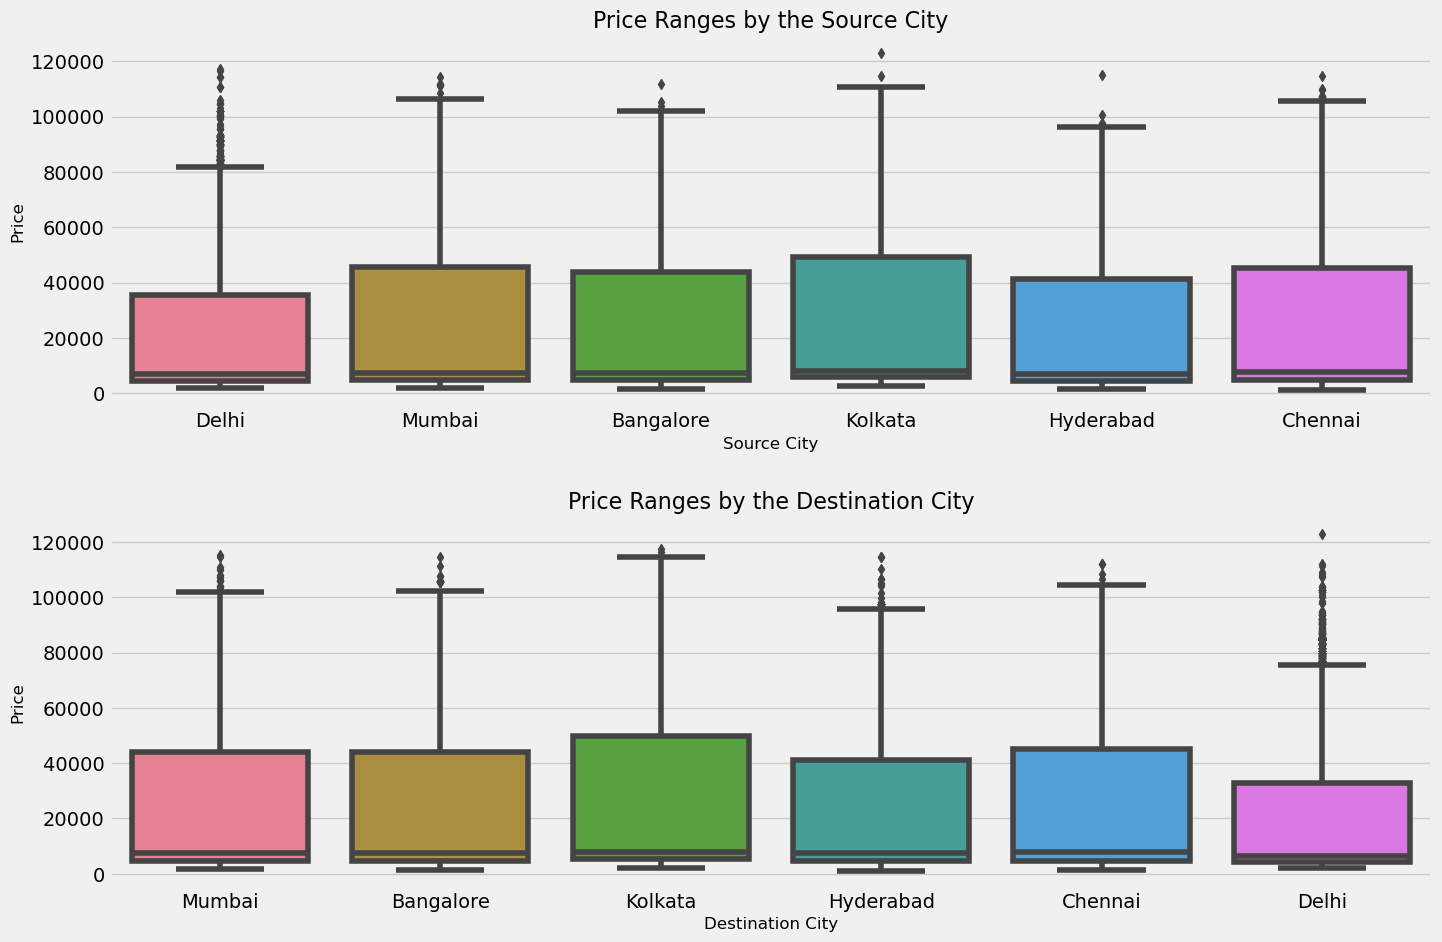

In [26]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x='source_city',y='price',data=df,palette='husl')
plt.title('Price Ranges by the Source City',fontsize=16)
plt.xlabel('Source City',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.subplot(2,1,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='husl')
plt.title('Price Ranges by the Destination City',fontsize=16)
plt.xlabel('Destination City',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.tight_layout(pad=2.0)
plt.show()


<Figure size 1500x500 with 0 Axes>

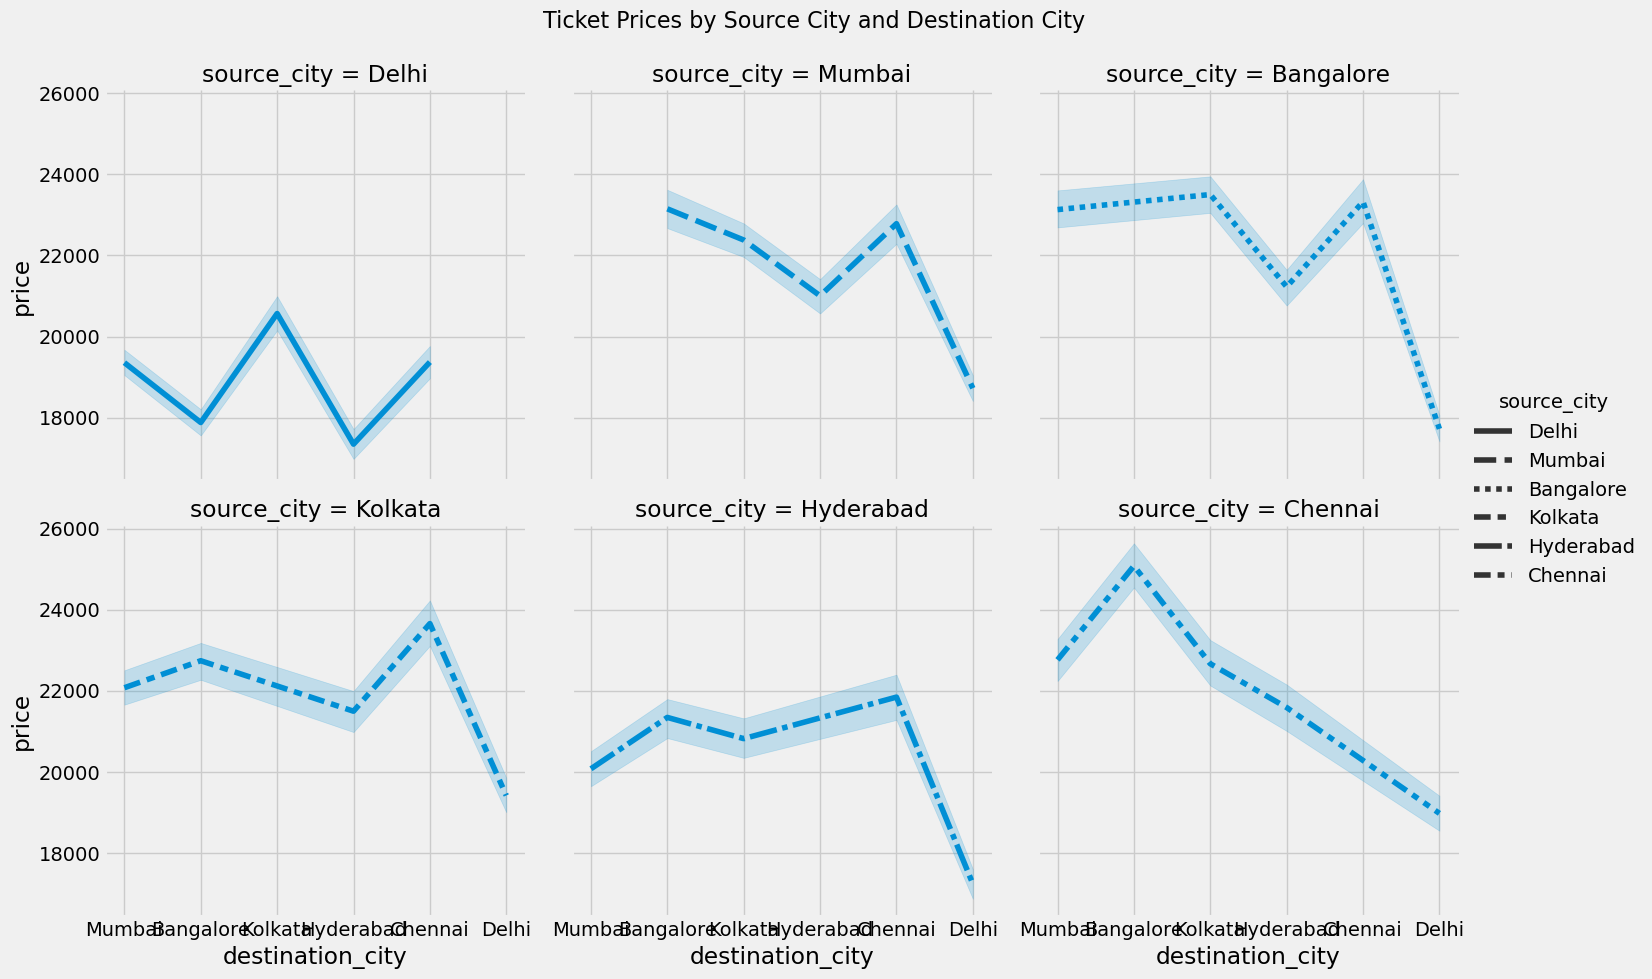

In [27]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=df, col_wrap=3, style='source_city')
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Ticket Prices by Source City and Destination City',fontsize=16)
plt.show()

In [28]:
df_bk=df.copy()
def preprocessing(df):
    df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)   
    return df

In [29]:
df_preprocessed = preprocessing(df)
df_preprocessed.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [30]:
df_preprocessed.corr().T

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
stops,1.000000,0.001027,0.468059,-0.008540,0.119648,0.060215,-0.033363,-0.172133,-0.087293,0.098758,0.021379,-0.052321,0.011196,0.046828,-0.022452,0.060865,-0.104565,0.029073,0.062722,-0.046849,0.010145,-0.041882,-0.035366,0.052600,-0.058166,-0.018657,0.070912,-0.018544,-0.045666,0.017965
class,0.001027,1.000000,0.138710,-0.013039,0.937860,0.124899,-0.194540,-0.275477,-0.118325,0.302116,0.010204,-0.014098,0.003367,-0.019162,0.015941,0.012331,-0.021200,0.007564,-0.012987,0.010573,-0.012120,0.010789,-0.029378,0.002801,0.049516,-0.041974,0.032833,-0.086238,0.039745,0.008035
duration,0.468059,0.138710,1.000000,-0.039157,0.204222,0.277283,-0.139380,-0.365953,0.008776,0.132430,0.033053,-0.049719,0.002595,0.061133,-0.023329,0.061271,-0.115412,0.065762,0.061440,-0.043900,-0.047092,0.104017,-0.045045,-0.071084,0.115464,0.010950,0.033094,-0.107301,0.122906,-0.064458
days_left,-0.008540,-0.013039,-0.039157,1.000000,-0.091949,-0.022721,0.030408,0.007839,-0.024414,-0.007002,0.002581,-0.001292,0.010817,0.000265,-0.008742,0.000456,0.006233,-0.000018,-0.003840,-0.004337,0.003322,-0.010238,0.012000,-0.003206,0.004004,0.020204,-0.013737,0.026500,-0.003619,-0.004593
price,0.119648,0.937860,0.204222,-0.091949,1.000000,0.070041,-0.194179,-0.280882,-0.114019,0.360816,0.018742,-0.043282,-0.012828,0.016127,0.013206,0.018473,-0.052527,-0.008292,0.020956,0.010533,-0.012232,0.007946,-0.033768,0.018199,0.041768,-0.060449,0.056408,-0.093602,0.030379,0.020344
airline_Air_India,0.060215,0.124899,0.277283,-0.022721,0.070041,1.000000,-0.175687,-0.248781,-0.106858,-0.523242,-0.011600,0.009886,0.001987,-0.001883,0.036697,0.005760,-0.017354,0.010900,-0.006201,0.042490,0.033703,0.019692,-0.006956,-0.024826,0.010730,-0.025510,-0.040356,-0.059937,0.066735,-0.001920
airline_GO_FIRST,-0.033363,-0.194540,-0.139380,0.030408,-0.194179,-0.175687,1.000000,-0.118471,-0.050886,-0.249171,-0.063273,0.030585,-0.023541,0.000409,0.026898,-0.059581,0.034305,-0.025814,-0.001016,0.026916,0.028405,-0.003699,0.008566,-0.040410,-0.025366,0.085654,-0.043881,0.100450,-0.063926,-0.000382
airline_Indigo,-0.172133,-0.275477,-0.365953,0.007839,-0.280882,-0.248781,-0.118471,1.000000,-0.072057,-0.352838,0.033626,-0.012615,0.009778,0.016766,-0.029344,0.018089,-0.002593,0.000244,0.033801,-0.031242,-0.032224,-0.020572,0.077697,0.028371,-0.072394,0.013864,0.007335,0.065025,-0.082781,-0.009271
airline_SpiceJet,-0.087293,-0.118325,0.008776,-0.024414,-0.114019,-0.106858,-0.050886,-0.072057,1.000000,-0.151553,0.003331,0.033040,-0.050872,0.030020,-0.004572,-0.002283,0.040668,-0.050272,0.029817,-0.000058,0.033931,0.003626,-0.011630,-0.028322,0.005247,0.022834,-0.042162,0.003302,0.030808,0.013312
airline_Vistara,0.098758,0.302116,0.132430,-0.007002,0.360816,-0.523242,-0.249171,-0.352838,-0.151553,1.000000,0.031174,-0.046163,0.028317,-0.027183,-0.006793,0.027766,-0.038389,0.035434,-0.030555,-0.016810,-0.036206,-0.005037,-0.056948,0.056992,0.042486,-0.058766,0.091317,-0.135247,0.030260,0.024874


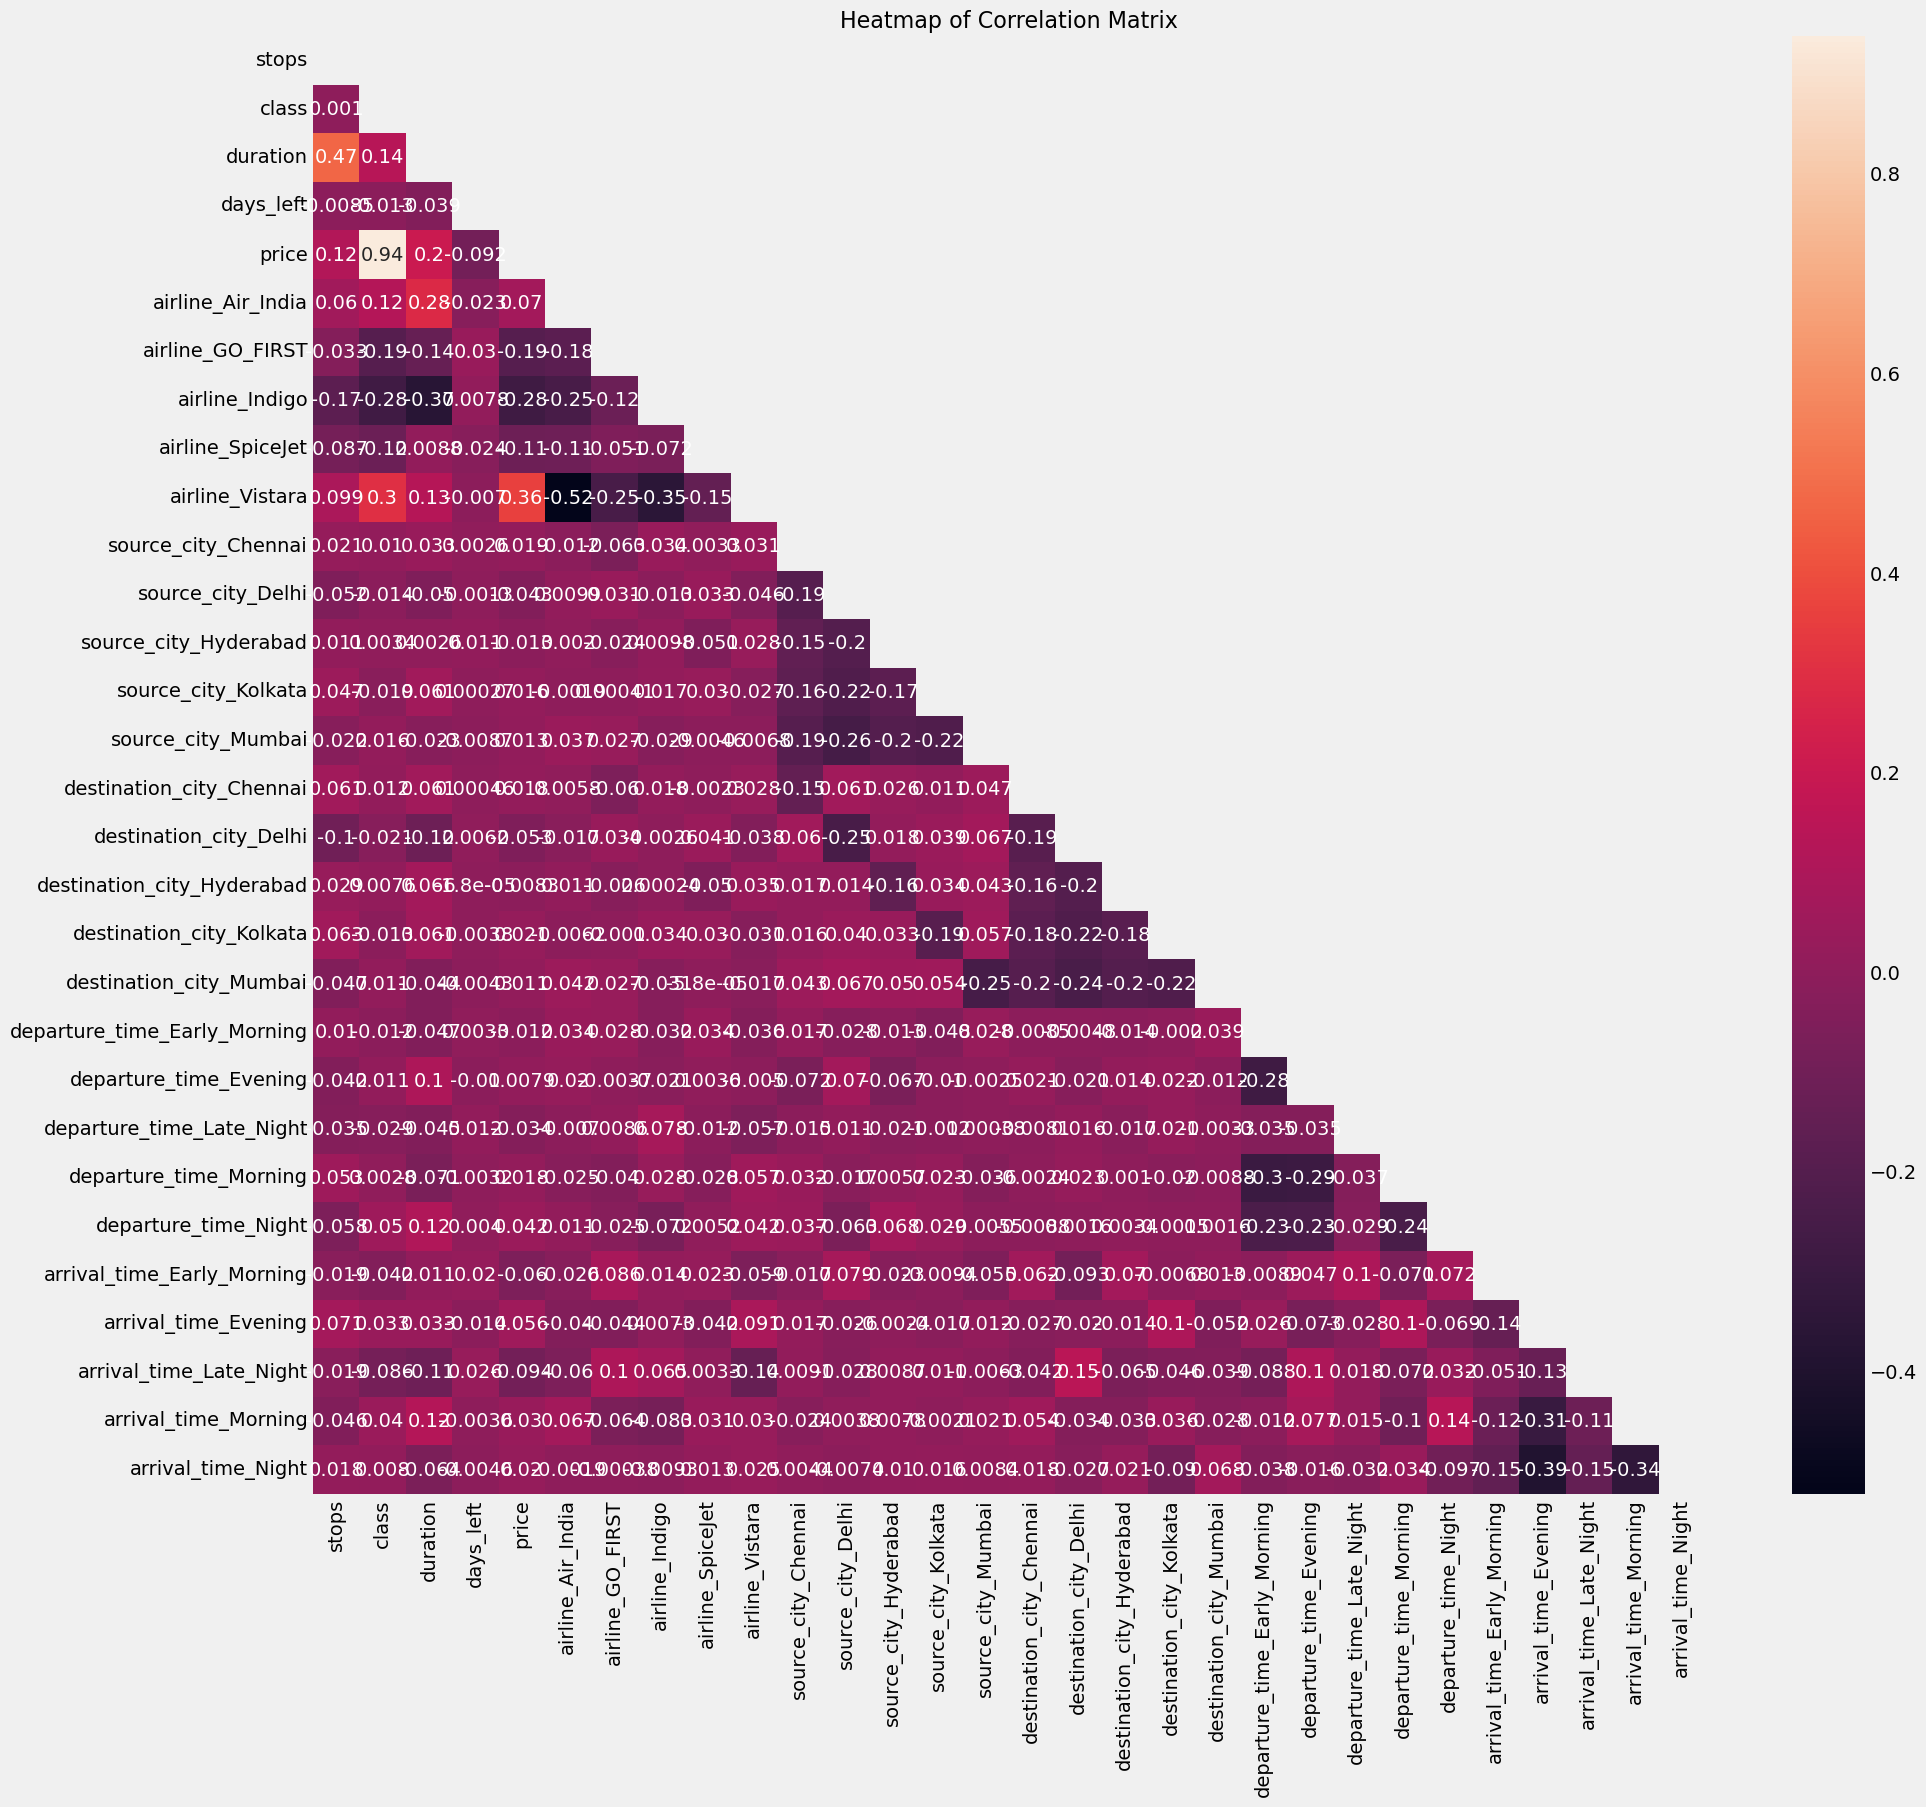

In [31]:
mask = np.triu(np.ones_like(df_preprocessed.corr(), dtype=bool))
plt.figure(figsize = (20,18))
corrMatrix = df_preprocessed.corr()
sns.heatmap(corrMatrix, mask=mask, annot=True)
plt.title('Heatmap of Correlation Matrix',fontsize=16)
plt.show()

In [32]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


In [33]:
X = df_preprocessed.copy()
y = X.pop('price')

mi_scores = make_mi_scores(X, y)

print(mi_scores)

duration                        2.416936
class                           0.618061
airline_Vistara                 0.516296
days_left                       0.477366
source_city_Delhi               0.431156
source_city_Mumbai              0.429834
airline_Air_India               0.403201
stops                           0.393255
destination_city_Delhi          0.387879
destination_city_Mumbai         0.382828
source_city_Kolkata             0.361059
source_city_Hyderabad           0.347045
destination_city_Kolkata        0.339032
source_city_Chennai             0.326053
destination_city_Hyderabad      0.321119
destination_city_Chennai        0.303286
airline_Indigo                  0.288444
airline_GO_FIRST                0.202520
arrival_time_Evening            0.126667
arrival_time_Night              0.107493
departure_time_Evening          0.104264
arrival_time_Morning            0.098781
departure_time_Morning          0.093396
departure_time_Early_Morning    0.086883
airline_SpiceJet

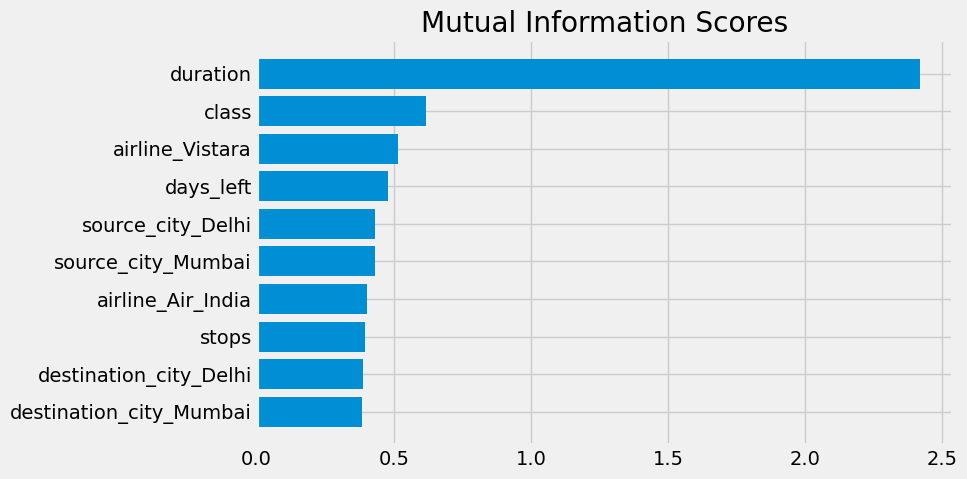

In [34]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(10))

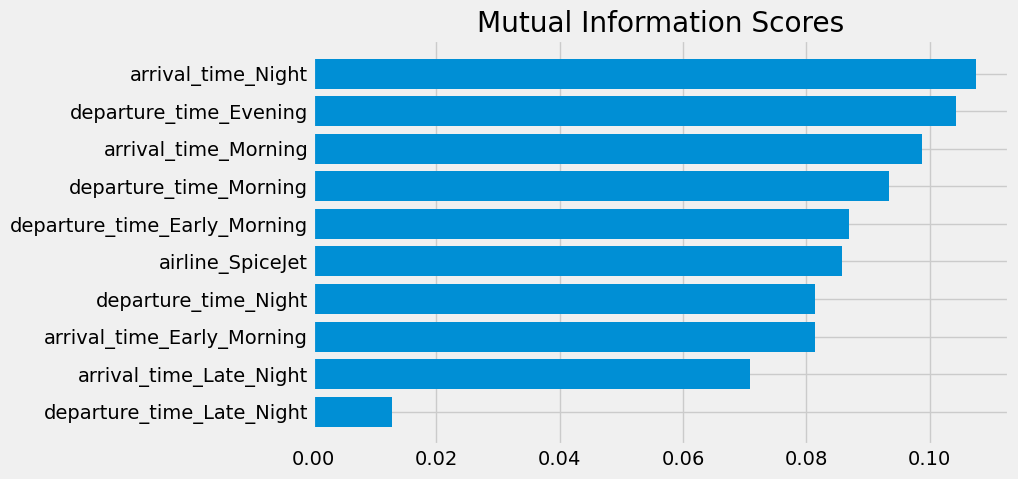

In [35]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.tail(10))

In [36]:
df_bk=df.copy()



from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

x=df.drop(['price'],axis=1)
y=df['price']


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [37]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [38]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Squared':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Squared,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor

modellr = LinearRegression()
modeldtr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelxgr = xgb.XGBRegressor()
modeletr = ExtraTreesRegressor()
modelbgr = BaggingRegressor()

MM = [modellr, modeldtr, modelrfr, modelxgr, modeletr, modelbgr]

for models in MM:
    
    models.fit(x_train, y_train)

    y_pred = models.predict(x_test)
    
    print('Model Name: ', models)

    from sklearn import metrics
    
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Squared: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Squared' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4539.344
Mean Squared Error (MSE): 48167176.637
Root Mean Squared Error (RMSE): 6940.258
R2_score: 0.906411
Root Mean Squared Log Error (RMSLE): 8.845
Mean Absolute Percentage Error (MAPE): 42.49 %
Adj R Squared:  0.906408
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1260.089
Mean Squared Error (MSE): 13666910.526
Root Mean Squared Error (RMSE): 3696.878
R2_score: 0.973445
Root Mean Squared Log Error (RMSLE): 8.215
Mean Absolute Percentage Error (MAPE): 8.66 %
Adj R Squared:  0.973444
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1170.789
Mean Squared Error (MSE): 8174853.183
Root Mean Squared Error (RMSE): 2859.17
R2_score: 0.984116
Root Mean Squared Log Error (RMSLE): 7.958
M

In [40]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','XGBRegressor','ExtraTreesRegressor','BaggingRegressor']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Squared']=Results['Adj_R_Squared']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Squared',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Squared,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.984739,1145.607301,2802.510565,7.637645,7.854065e+06,7.938271,0.984740
1,RandomForestRegressor,0.984115,1170.789380,2859.170016,7.935526,8.174853e+06,7.958287,0.984116
2,BaggingRegressor,0.982472,1206.517872,3003.399822,8.191085,9.020410e+06,8.007500,0.982473
3,XGBRegressor,0.977565,1862.956031,3397.931586,14.372367,1.154594e+07,8.130922,0.977566
4,DecisionTreeRegressor,0.973444,1260.089253,3696.878484,8.658686,1.366691e+07,8.215244,0.973445
5,LinearRegression,0.906408,4539.344280,6940.257678,42.491869,4.816718e+07,8.845094,0.906411


In [41]:
modeletr.fit(x_train, y_train)
    
y_pred = modeletr.predict(x_test)



out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

result.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
130540,Vistara,UK-706,Kolkata,Morning,1,Evening,Mumbai,0,7.42,21,6067,6067,7972.80
8661,Vistara,UK-835,Delhi,Evening,1,Morning,Mumbai,0,15.75,43,5040,5040,5153.01
276366,Vistara,UK-874,Hyderabad,Morning,1,Late_Night,Delhi,1,16.42,33,39555,39555,40606.02
162821,Vistara,UK-880,Hyderabad,Afternoon,1,Night,Mumbai,0,6.67,31,5375,5375,5279.28
208681,Air_India,AI-885,Delhi,Morning,1,Late_Night,Mumbai,1,13.25,20,47217,47217,47215.88


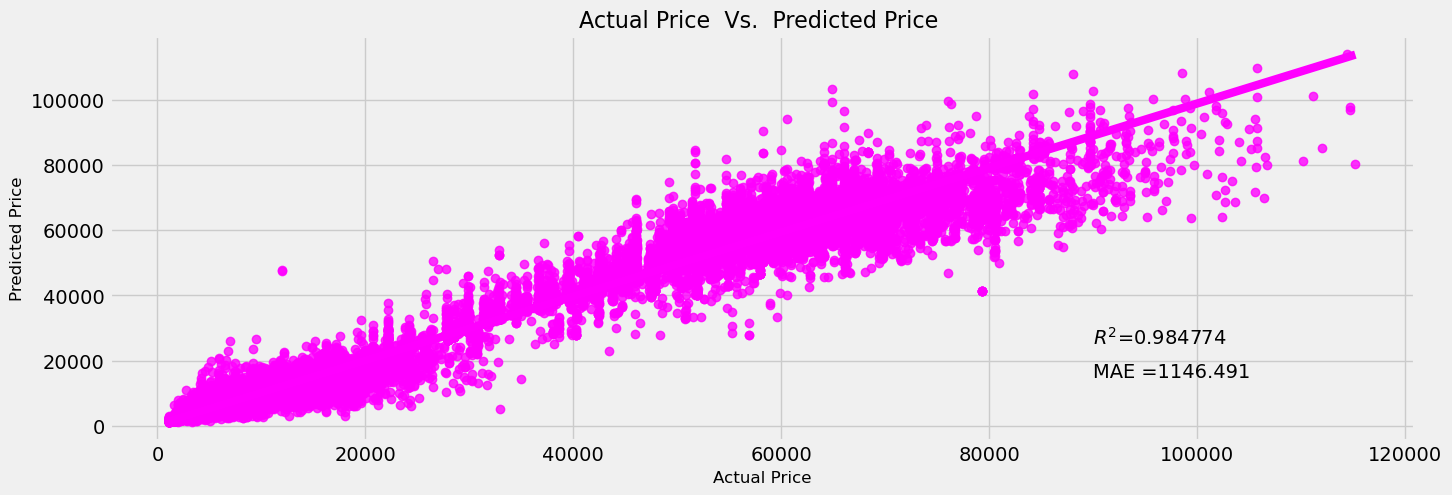

In [42]:
plt.figure(figsize=(15,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='magenta')
plt.title('Actual Price  Vs.  Predicted Price ',fontsize=16)
plt.xlabel('Actual Price',fontsize=12)
plt.ylabel('Predicted Price',fontsize=12)
r_squared = round(metrics.r2_score(y_test, y_pred),6)
Mean_Absolute_Error_MAE =  round(metrics.mean_absolute_error(y_test, y_pred),3)
plt.text(90000,25000,'$ R^{2} $=' + str(r_squared),fontsize=14)
plt.text(90000,15000,'MAE =' + str(Mean_Absolute_Error_MAE),fontsize=14)
plt.show()